# **Liver cirrhosis prediction using Logistic Regression**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Loading dataset 📊

In [2]:
data = pd.read_csv("train.csv")
data.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,1086.0,NaN,18628.0,F,NaN,NaN,NaN,N,0.9,NaN,3.01,NaN,NaN,NaN,NaN,244.0,10.0,2.0,C
1,1,3231.0,NaN,18263.0,F,NaN,NaN,NaN,N,0.9,NaN,4.01,NaN,NaN,NaN,NaN,244.0,10.9,2.0,C
2,2,1072.0,NaN,14245.0,F,NaN,NaN,NaN,N,1.0,NaN,3.50,NaN,NaN,NaN,NaN,209.0,10.8,2.0,C
3,3,3611.0,Placebo,20604.0,F,N,Y,Y,N,0.5,248.0,3.43,54.0,1260.0,72.85,106.0,430.0,10.6,2.0,D
4,4,2657.0,NaN,17897.0,F,NaN,NaN,NaN,N,0.9,NaN,3.93,NaN,NaN,NaN,NaN,209.0,10.0,2.0,C


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15000 non-null  int64  
 1   N_Days         15000 non-null  float64
 2   Drug           8581 non-null   object 
 3   Age            15000 non-null  float64
 4   Sex            15000 non-null  object 
 5   Ascites        8585 non-null   object 
 6   Hepatomegaly   8581 non-null   object 
 7   Spiders        8574 non-null   object 
 8   Edema          15000 non-null  object 
 9   Bilirubin      15000 non-null  float64
 10  Cholesterol    6704 non-null   float64
 11  Albumin        15000 non-null  float64
 12  Copper         8469 non-null   float64
 13  Alk_Phos       8573 non-null   float64
 14  SGOT           8570 non-null   float64
 15  Tryglicerides  6648 non-null   float64
 16  Platelets      14421 non-null  float64
 17  Prothrombin    14978 non-null  float64
 18  Stage 

In [4]:
data.isnull().sum()

id                  0
N_Days              0
Drug             6419
Age                 0
Sex                 0
Ascites          6415
Hepatomegaly     6419
Spiders          6426
Edema               0
Bilirubin           0
Cholesterol      8296
Albumin             0
Copper           6531
Alk_Phos         6427
SGOT             6430
Tryglicerides    8352
Platelets         579
Prothrombin        22
Stage               0
Status              0
dtype: int64

In [5]:
num_col = data.select_dtypes("number")
num_col.head()

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,0,1086.0,18628.0,0.9,NaN,3.01,NaN,NaN,NaN,NaN,244.0,10.0,2.0
1,1,3231.0,18263.0,0.9,NaN,4.01,NaN,NaN,NaN,NaN,244.0,10.9,2.0
2,2,1072.0,14245.0,1.0,NaN,3.50,NaN,NaN,NaN,NaN,209.0,10.8,2.0
3,3,3611.0,20604.0,0.5,248.0,3.43,54.0,1260.0,72.85,106.0,430.0,10.6,2.0
4,4,2657.0,17897.0,0.9,NaN,3.93,NaN,NaN,NaN,NaN,209.0,10.0,2.0


# Handling missing values 🔎

## For numeric column1️⃣

In [7]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer()

for i in data.select_dtypes("number"):
    data[[i]] = imputer.fit_transform(data[[i]])

data.isnull().sum()

id                  0
N_Days              0
Drug             6419
Age                 0
Sex                 0
Ascites          6415
Hepatomegaly     6419
Spiders          6426
Edema               0
Bilirubin           0
Cholesterol         0
Albumin             0
Copper              0
Alk_Phos            0
SGOT                0
Tryglicerides       0
Platelets           0
Prothrombin         0
Stage               0
Status              0
dtype: int64

## For categorical column🅰️

In [8]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
simple_imputer = SimpleImputer(strategy="most_frequent")

for i in data.columns[data.dtypes == "object"]:
    data[[i]] = simple_imputer.fit_transform(data[[i]])

data.isnull().sum()

id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
dtype: int64

## Age column days to year 🔞

In [9]:
data["Age"] = round(data.Age/365)

In [10]:
data["Age"] = data["Age"].astype(int)

In [11]:
data.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0.0,1086.0,D-penicillamine,51,F,N,N,N,N,0.9,328.211217,3.01,75.039084,1659.493211,106.320257,110.97573,244.0,10.0,2.0,C
1,1.0,3231.0,D-penicillamine,50,F,N,N,N,N,0.9,328.211217,4.01,75.039084,1659.493211,106.320257,110.97573,244.0,10.9,2.0,C
2,2.0,1072.0,D-penicillamine,39,F,N,N,N,N,1.0,328.211217,3.50,75.039084,1659.493211,106.320257,110.97573,209.0,10.8,2.0,C
3,3.0,3611.0,Placebo,56,F,N,Y,Y,N,0.5,248.000000,3.43,54.000000,1260.000000,72.850000,106.00000,430.0,10.6,2.0,D
4,4.0,2657.0,D-penicillamine,49,F,N,N,N,N,0.9,328.211217,3.93,75.039084,1659.493211,106.320257,110.97573,209.0,10.0,2.0,C


## Distribution of numeric colums📈

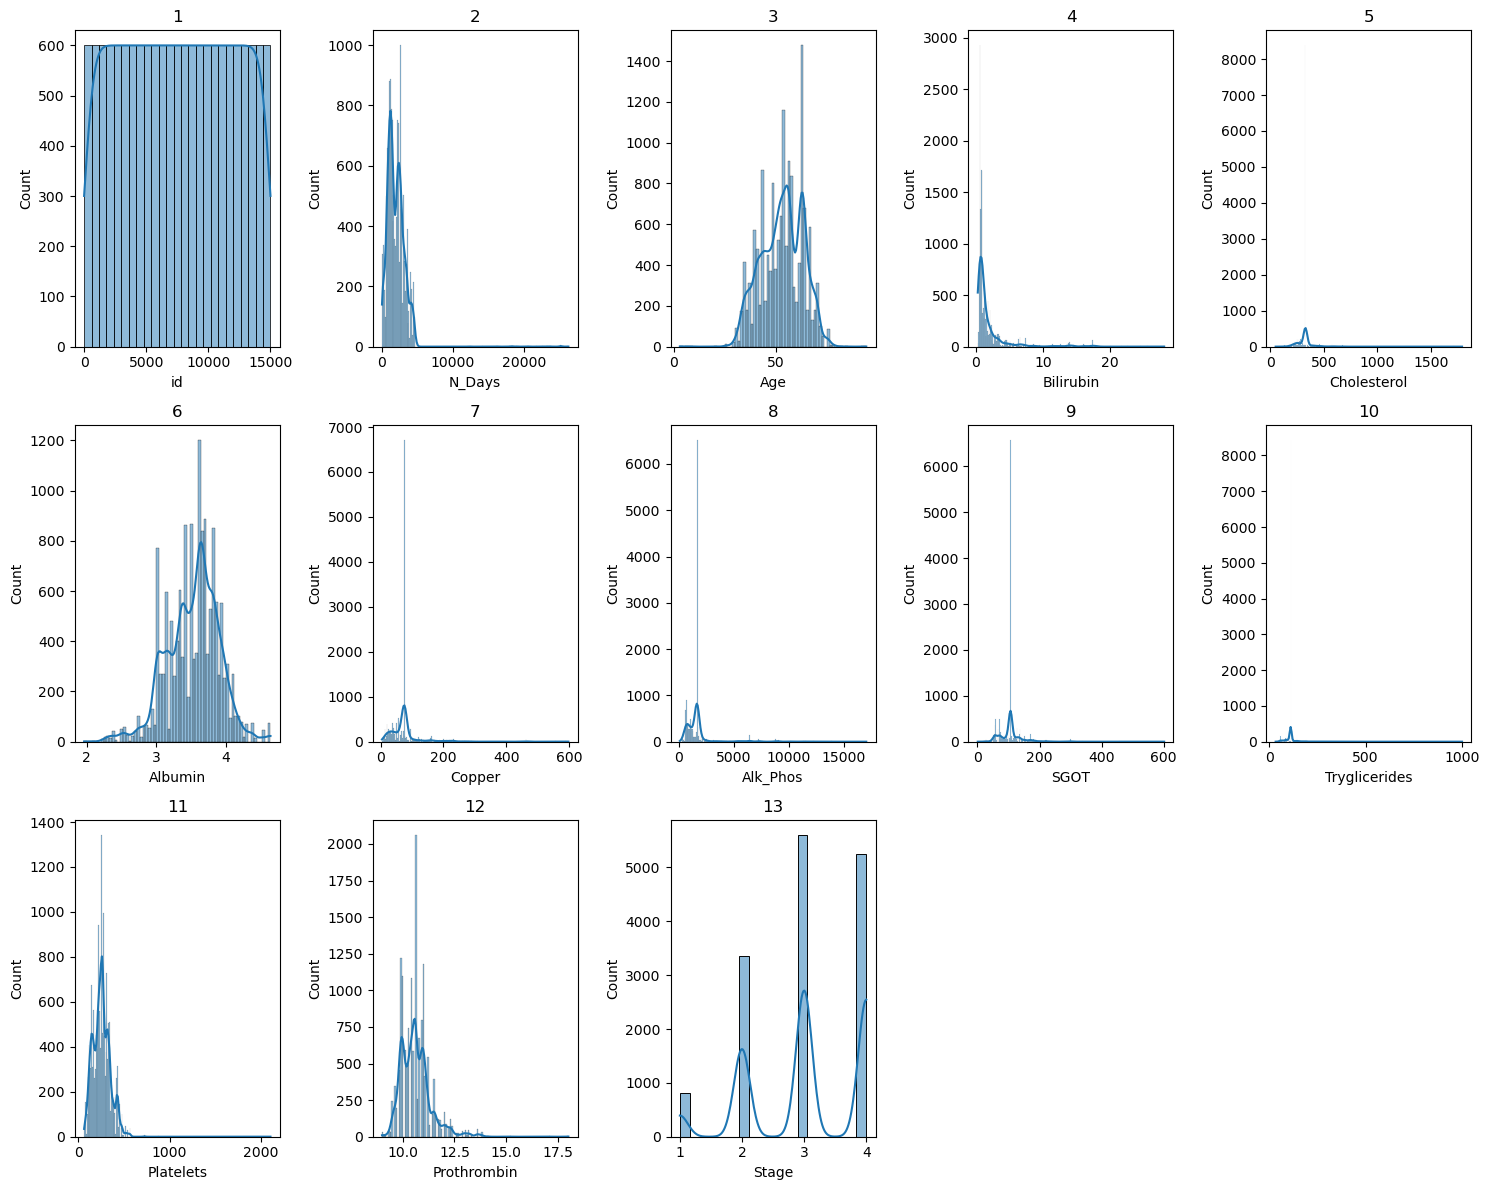

In [12]:
plt.figure(figsize=(15,12))
for i,j in enumerate(data.select_dtypes("number").columns,1):
    plt.subplot(3,5,i)
    sns.histplot(data[j],kde=True)
    plt.title(i)
plt.tight_layout()

# Outliers🔎

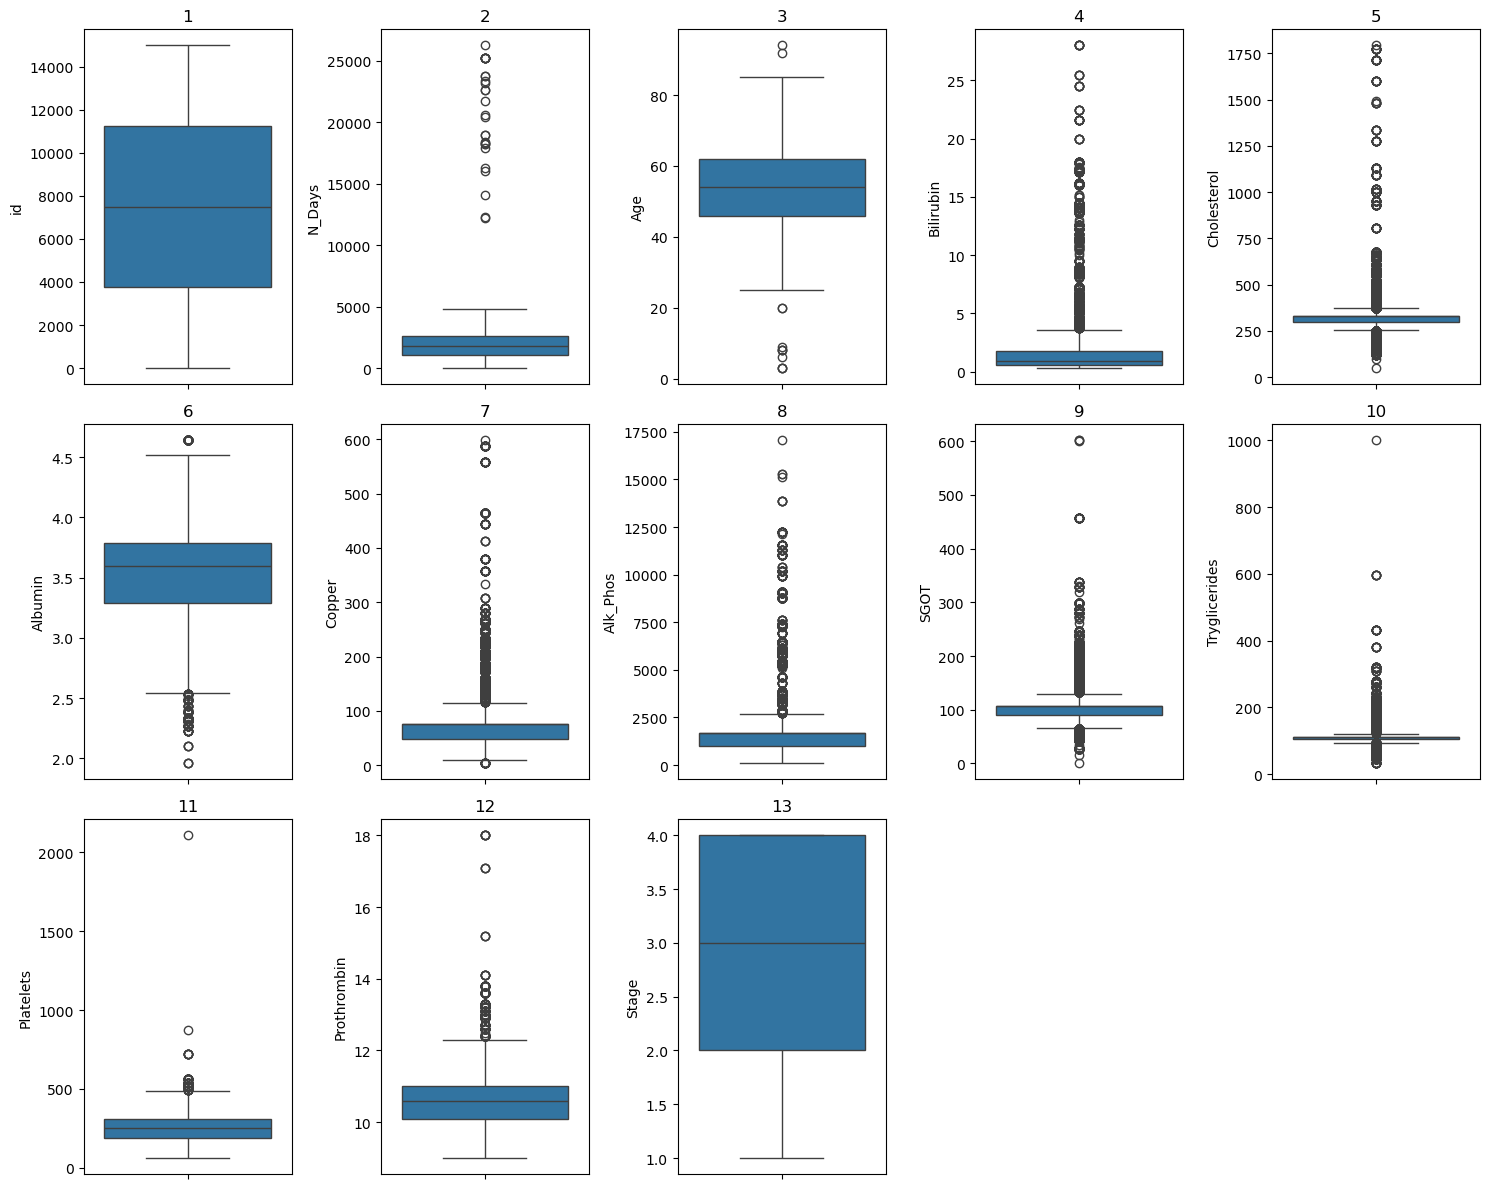

In [13]:
plt.figure(figsize=(15,12))
for i,j in enumerate(data.select_dtypes("number").columns,1):
    plt.subplot(3,5,i)
    sns.boxplot(data[j])
    plt.title(i)
plt.tight_layout()

## Removing extreme points

In [14]:
data1 = data.copy()

In [15]:
data1["id"] = data1["id"].astype(int)

In [16]:
data1 = data1[
    (data1["N_Days"] <= 20000) &
    (data1["Age"] > 20) &
    (data1["Bilirubin"] <= 20) &
    (data1["Cholesterol"] <= 1100) &
    (data1["Albumin"] > 2.2) & (data1["Albumin"] <= 4.5) &  # Properly grouped Albumin condition
    (data1["Copper"] <= 350) &
    (data1["Alk_Phos"] <= 10000) &
    (data1["SGOT"] <= 300) &
    (data1["Tryglicerides"] <= 300) &
    (data1["Platelets"] <= 520) &
    (data1["Prothrombin"] <= 13)
]


# Labelencoding🔢

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data1["Status"] = le.fit_transform(data1["Status"])
data1.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,1086.0,D-penicillamine,51,F,N,N,N,N,0.9,328.211217,3.01,75.039084,1659.493211,106.320257,110.97573,244.0,10.0,2.0,0
1,1,3231.0,D-penicillamine,50,F,N,N,N,N,0.9,328.211217,4.01,75.039084,1659.493211,106.320257,110.97573,244.0,10.9,2.0,0
2,2,1072.0,D-penicillamine,39,F,N,N,N,N,1.0,328.211217,3.50,75.039084,1659.493211,106.320257,110.97573,209.0,10.8,2.0,0
3,3,3611.0,Placebo,56,F,N,Y,Y,N,0.5,248.000000,3.43,54.000000,1260.000000,72.850000,106.00000,430.0,10.6,2.0,2
4,4,2657.0,D-penicillamine,49,F,N,N,N,N,0.9,328.211217,3.93,75.039084,1659.493211,106.320257,110.97573,209.0,10.0,2.0,0


In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data1["Drug"] = le.fit_transform(data1.Drug)
data1["Sex"] = le.fit_transform(data1.Sex)
data1["Ascites"] = le.fit_transform(data1.Ascites)
data1["Hepatomegaly"] = le.fit_transform(data1.Hepatomegaly)
data1["Spiders"] = le.fit_transform(data1.Spiders)
data1["Edema"] = le.fit_transform(data1.Edema)

In [21]:
data1.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,1086.0,0,51,0,0,0,0,0,0.9,328.211217,3.01,75.039084,1659.493211,106.320257,110.97573,244.0,10.0,2.0,0
1,1,3231.0,0,50,0,0,0,0,0,0.9,328.211217,4.01,75.039084,1659.493211,106.320257,110.97573,244.0,10.9,2.0,0
2,2,1072.0,0,39,0,0,0,0,0,1.0,328.211217,3.50,75.039084,1659.493211,106.320257,110.97573,209.0,10.8,2.0,0
3,3,3611.0,1,56,0,0,1,1,0,0.5,248.000000,3.43,54.000000,1260.000000,72.850000,106.00000,430.0,10.6,2.0,2
4,4,2657.0,0,49,0,0,0,0,0,0.9,328.211217,3.93,75.039084,1659.493211,106.320257,110.97573,209.0,10.0,2.0,0


# Building model on Train dataset⚙️

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,log_loss
scaler = StandardScaler()

X,Y = data1.drop(columns=["Status"]),data1.Status
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=.20, random_state=42)

X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [23]:
model = LogisticRegression(multi_class="multinomial")
model.fit(X_train_scaled, y_train)

y_pred_proba = model.predict_proba(X_test_scaled)
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

logloss = log_loss(y_test, y_pred_proba)
print(round(logloss,2))


0.8233638282899367
0.45


# Training test dataset👁️

In [25]:
test = pd.read_csv("test.csv")

In [26]:
test.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,15000,2055.0,D-penicillamine,12398.0,F,N,N,N,N,0.9,304.0,3.00,75.0,1622.0,116.25,169.0,358.0,9.9,1.0
1,15001,71.0,D-penicillamine,20442.0,F,Y,Y,Y,Y,2.1,178.0,3.08,558.0,6064.8,227.04,191.0,165.0,12.0,4.0
2,15002,3336.0,D-penicillamine,23011.0,F,N,N,N,N,0.7,251.0,3.35,30.0,662.0,57.35,107.0,344.0,10.7,2.0
3,15003,1150.0,NaN,18993.0,F,NaN,NaN,NaN,N,0.9,NaN,3.29,NaN,NaN,NaN,NaN,256.0,10.8,2.0
4,15004,2363.0,D-penicillamine,18118.0,F,N,Y,N,N,0.9,315.0,3.40,35.0,1840.0,170.50,70.0,356.0,10.9,2.0


In [27]:
test.isnull().sum()

id                  0
N_Days              0
Drug             4373
Age                 0
Sex                 0
Ascites          4360
Hepatomegaly     4373
Spiders          4373
Edema               0
Bilirubin           1
Cholesterol      5590
Albumin             0
Copper           4433
Alk_Phos         4372
SGOT             4376
Tryglicerides    5627
Platelets         403
Prothrombin        18
Stage               0
dtype: int64

In [28]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             10000 non-null  int64  
 1   N_Days         10000 non-null  float64
 2   Drug           5627 non-null   object 
 3   Age            10000 non-null  float64
 4   Sex            10000 non-null  object 
 5   Ascites        5640 non-null   object 
 6   Hepatomegaly   5627 non-null   object 
 7   Spiders        5627 non-null   object 
 8   Edema          10000 non-null  object 
 9   Bilirubin      9999 non-null   float64
 10  Cholesterol    4410 non-null   float64
 11  Albumin        10000 non-null  float64
 12  Copper         5567 non-null   float64
 13  Alk_Phos       5628 non-null   float64
 14  SGOT           5624 non-null   float64
 15  Tryglicerides  4373 non-null   float64
 16  Platelets      9597 non-null   float64
 17  Prothrombin    9982 non-null   float64
 18  Stage  

## Handling missing value of test data💉

In [29]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer()

for i in test.select_dtypes("number"):
    test[[i]] = imputer.fit_transform(test[[i]])

test.isnull().sum()

id                  0
N_Days              0
Drug             4373
Age                 0
Sex                 0
Ascites          4360
Hepatomegaly     4373
Spiders          4373
Edema               0
Bilirubin           0
Cholesterol         0
Albumin             0
Copper              0
Alk_Phos            0
SGOT                0
Tryglicerides       0
Platelets           0
Prothrombin         0
Stage               0
dtype: int64

In [30]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
simple_imputer = SimpleImputer(strategy="most_frequent")

for i in test.columns[test.dtypes == "object"]:
    test[[i]] = simple_imputer.fit_transform(test[[i]])

test.isnull().sum()

id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

## Age column days to year

In [31]:
test["Age"] = round(test.Age/365)

In [32]:
test["Age"] = test["Age"].astype(int)
test["id"] = test["id"].astype(int)

In [33]:
test.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,15000,2055.0,D-penicillamine,34,F,N,N,N,N,0.9,304.000000,3.00,75.000,1622.000000,116.250000,169.000000,358.0,9.9,1.0
1,15001,71.0,D-penicillamine,56,F,Y,Y,Y,Y,2.1,178.000000,3.08,558.000,6064.800000,227.040000,191.000000,165.0,12.0,4.0
2,15002,3336.0,D-penicillamine,63,F,N,N,N,N,0.7,251.000000,3.35,30.000,662.000000,57.350000,107.000000,344.0,10.7,2.0
3,15003,1150.0,D-penicillamine,52,F,N,N,N,N,0.9,327.250794,3.29,76.494,1640.952184,105.656142,110.647839,256.0,10.8,2.0
4,15004,2363.0,D-penicillamine,50,F,N,Y,N,N,0.9,315.000000,3.40,35.000,1840.000000,170.500000,70.000000,356.0,10.9,2.0


## Outliers🔎

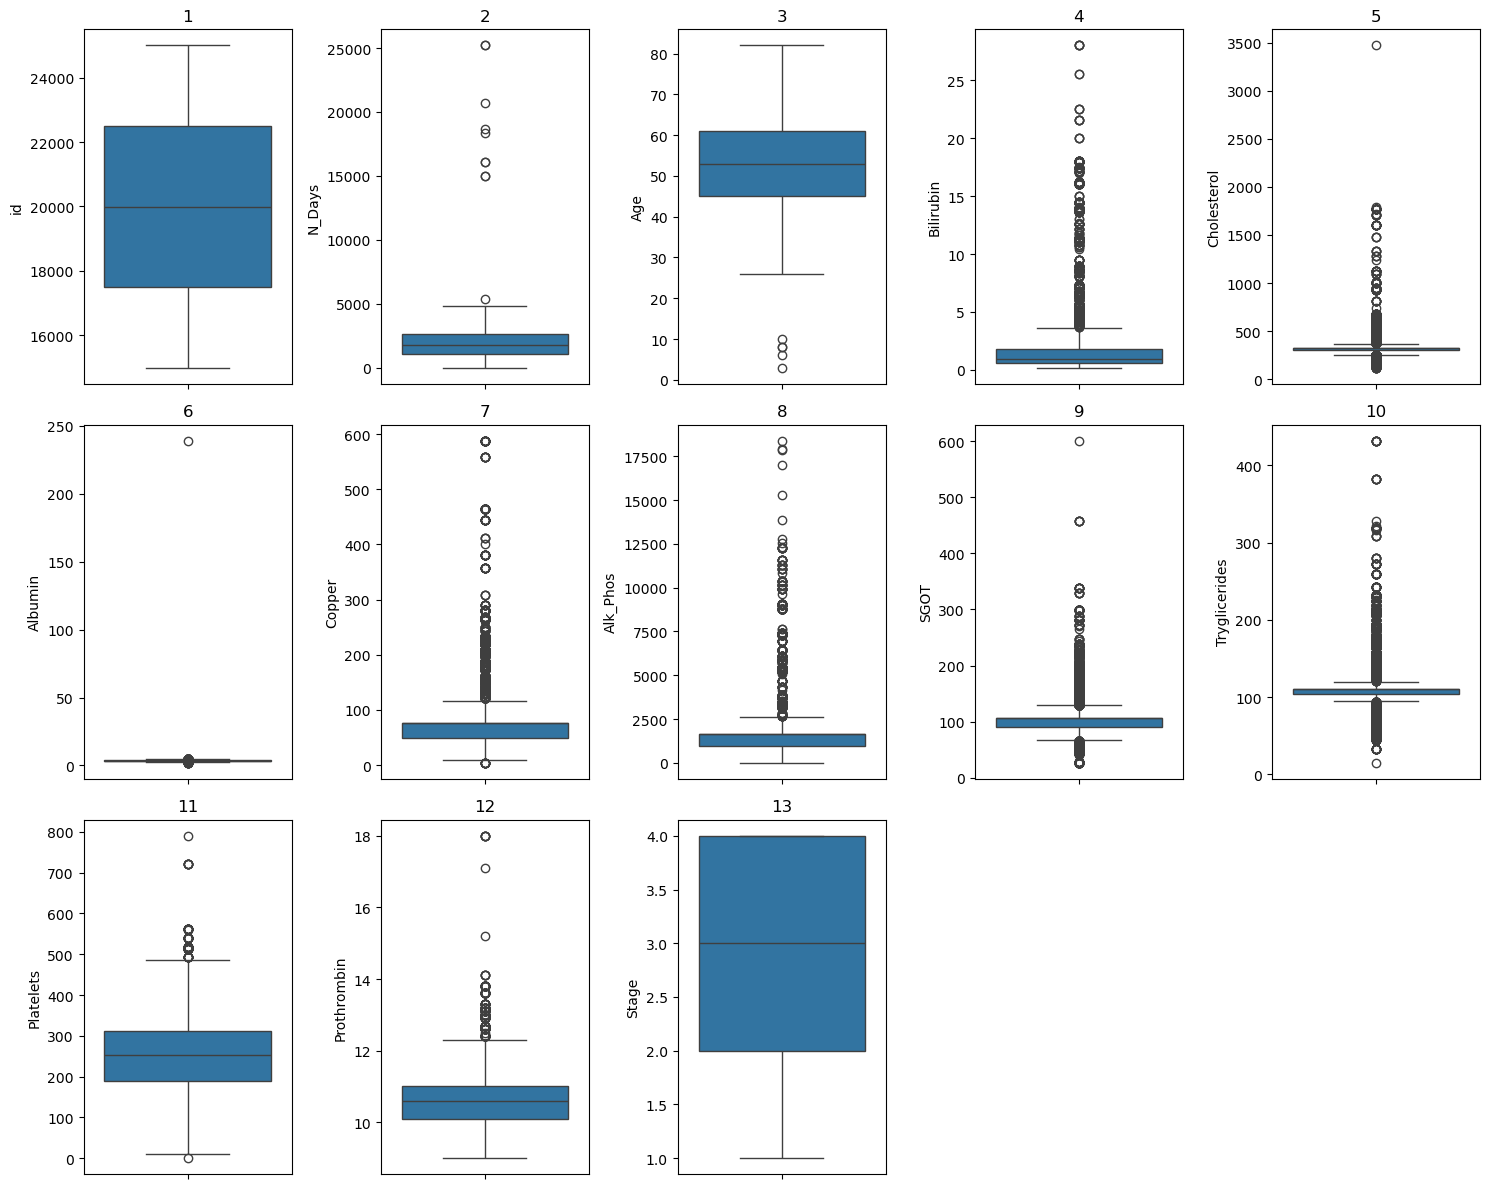

In [34]:
plt.figure(figsize=(15,12))
for i,j in enumerate(test.select_dtypes("number").columns,1):
    plt.subplot(3,5,i)
    sns.boxplot(test[j])
    plt.title(i)
plt.tight_layout()

In [35]:
test1 = test.copy()

## Labelencoding🔢

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Apply label encoding to the categorical variables in test1
test1["Drug"] = le.fit_transform(test1["Drug"])
test1["Sex"] = le.fit_transform(test1["Sex"])
test1["Ascites"] = le.fit_transform(test1["Ascites"])
test1["Hepatomegaly"] = le.fit_transform(test1["Hepatomegaly"])
test1["Spiders"] = le.fit_transform(test1["Spiders"])
test1["Edema"] = le.fit_transform(test1["Edema"])


In [49]:
X_train = data1.drop(columns=['Status','id'])  
y_train = data1['Status']  

X_test = test1.drop(columns=['id'])  

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  
X_test_scaled = scaler.transform(X_test)  

model = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=2000)
model.fit(X_train_scaled, y_train)

y_test_proba = model.predict_proba(X_test_scaled)

submission_df = pd.DataFrame(y_test_proba, columns=['Status_C', 'Status_CL', 'Status_D'])
submission_df.insert(0, 'id', test1['id'])  
submission_df.to_csv('log_file.csv', index=False)



In [48]:
submission_df

,id,Status_C,Status_CL,Status_D
0,15000,0.907819,0.070036,0.022145
1,15001,0.000017,0.000053,0.999930
2,15002,0.943018,0.002653,0.054328
3,15003,0.765019,0.016748,0.218233
4,15004,0.739153,0.022224,0.238622
...,...,...,...,...
9995,24995,0.132492,0.001776,0.865732
9996,24996,0.751783,0.005960,0.242256
9997,24997,0.859086,0.061719,0.079195
9998,24998,0.007185,0.003349,0.989466
